<a href="https://colab.research.google.com/github/sajed-s/Grapgh-Code/blob/main/Kasra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# Read data from CSV files
control_data = pd.read_csv('control_data.csv', index_col=0)
patient_data = pd.read_csv('patient_data.csv', index_col=0)

# Calculate mean, max, and min for each group
control_means = control_data.mean()
control_max = control_data.max()
control_min = control_data.min()

patient_means = patient_data.mean()
patient_max = patient_data.max()
patient_min = patient_data.min()

# Calculate p-values for each enzyme using t-test
p_values = []
for enzyme in control_data.index:
    control_values = control_data.loc[enzyme]
    patient_values = patient_data.loc[enzyme]
    p_value = ttest_ind(control_values, patient_values).pvalue
    p_values.append(p_value)

p_values = np.array(p_values)


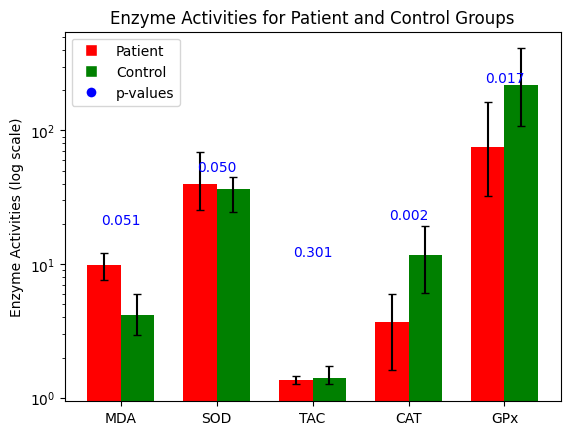

In [11]:
import matplotlib.pyplot as plt
import numpy as np
'''
enzymes = ["MDA","SOD","TAC","CAT","GPx"]
patient_means = np.array([9.85,39.73,1.35,3.7,75.63])
control_means = np.array([4.17,36.41,1.42,11.81,218.48])
patient_min = np.array([7.67,25.44,1.26,1.62,32.41])
patient_max = np.array([12.2,69.63,1.47,6,162.06])
control_min = np.array([2.97,24.63,1.26,6.14,108.04])
control_max = np.array([6,44.74,1.73,19.42,410.56])
compared_values = np.array([0.051,0.05,0.301,0.002,0.017])
'''
x = np.arange(len(enzymes))
width = 0.35

fig, ax = plt.subplots()

# Plotting the bars with a logarithmic scale
rects1 = ax.bar(x - width/2, patient_means, width, label='Patient', color='red')
rects2 = ax.bar(x + width/2, control_means, width, label='Control', color='green')

# Adding error bars for min and max values
ax.errorbar(x - width/2, patient_means, yerr=[patient_means - patient_min, patient_max - patient_means], fmt='none', color='black', capsize=3)
ax.errorbar(x + width/2, control_means, yerr=[control_means - control_min, control_max - control_means], fmt='none', color='black', capsize=3)

# Adding compared values (p-values) as annotations with custom color
for i, comp_value in enumerate(compared_values):
    ax.annotate(f"{comp_value:.3f}", (x[i], max(patient_means[i], control_means[i]) + 10), color='blue', ha='center')

# Adding labels, title, and legend
ax.set_ylabel('Enzyme Activities (log scale)')
ax.set_title('Enzyme Activities for Patient and Control Groups')
ax.set_xticks(x)
ax.set_xticklabels(enzymes)

# Set a logarithmic scale for the y-axis
ax.set_yscale('log')

# Create custom legend entries for patient, control, and p-values
patient_legend = plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=8, label='Patient')
control_legend = plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='green', markersize=8, label='Control')
pvalue_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='p-values')

ax.legend(handles=[patient_legend, control_legend, pvalue_legend], loc='upper left')

plt.show()








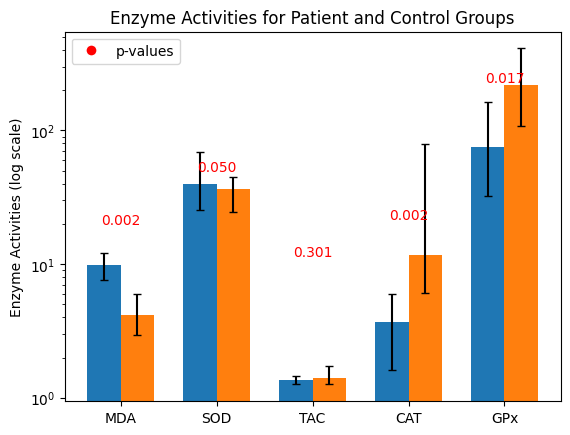